In [64]:
import pandas as pd
import numpy as np

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV 파일을 읽을 때 열 이름을 자동 생성하지 않고 탭을 구분자로 사용
raw = pd.read_csv('/content/drive/MyDrive/weit/LOCAL_PEOPLE_DONG_202309.csv')



In [ ]:
raw.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20230901,0,11305606,16725.1626,668.1093,357.1459,387.1479,408.7956,383.4516,409.4626,...,473.1917,465.2324,573.6154,431.4922,822.3150,686.1045,751.8624,658.5704,545.8382,2190.1595
1,20230901,0,11230710,18732.5859,388.8012,190.0529,584.8297,1965.4765,1299.1522,608.6793,...,1401.3736,580.7139,513.5663,470.3295,433.8882,408.8975,450.6626,430.8210,333.5268,1152.3266
2,20230901,0,11470570,13626.5027,676.8479,315.8618,383.2754,236.8682,400.2633,435.9295,...,458.5527,518.1087,674.3493,515.2251,563.0604,482.2232,514.1987,519.4217,393.0210,939.0295
3,20230901,0,11305620,18972.3765,700.8971,371.8227,406.3985,490.8980,579.3361,530.9673,...,621.0791,561.7733,614.9897,684.6790,826.5999,830.6584,876.5571,835.9875,628.4523,1883.1605
4,20230901,0,11305600,13583.3885,455.8465,267.2508,323.0809,314.1218,448.9254,369.9027,...,461.8117,380.9837,417.2087,424.7938,535.5580,564.7775,604.1401,640.7807,463.0637,1425.0254


In [ ]:
raw = raw[['기준일ID', '행정동코드', '총생활인구수']]

In [ ]:
raw.tail()

,기준일ID,행정동코드,총생활인구수
295099,20230930,11530730,18130.9735
295100,20230930,11110615,28696.5405
295101,20230930,11110710,10176.9055
295102,20230930,11215870,23514.4348
295103,20230930,11290610,14354.4179


In [ ]:
grouped_data = raw.groupby('행정동코드')['총생활인구수'].sum()

# 결과를 데이터프레임으로 변환
result = grouped_data.reset_index()

# '총생활인구수'를 내림차순으로 정렬
result = result.sort_values(by='총생활인구수', ascending=False)

result['순위'] = result['총생활인구수'].rank(ascending=False, method='min').astype(int)

In [ ]:
specific_row = result[result['행정동코드'] == 11440740]

In [ ]:
result.to_csv('동생활인구순위.csv',index=False,encoding="utf-8-sig")

In [ ]:
specific_row

,행정동코드,총생활인구수,순위
221,11440740,3.508332e+07,13


## 상위 3개동 작업

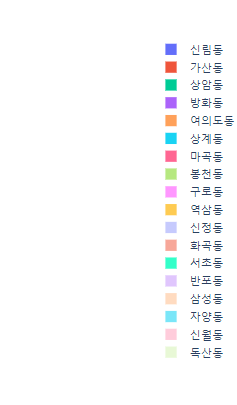

In [ ]:
raw = pd.read_csv('/content/drive/MyDrive/weit/seoul/서울민원데이터.csv')

In [66]:
역삼=raw[raw['Dong']=='역삼동']
역삼.reset_index(drop=True, inplace=True)
서교=raw[raw['Dong']=='서교동']
서교.reset_index(drop=True, inplace=True)

In [72]:
종로 = raw[(raw['Dong'] == '종로1가') | (raw['Dong'] == '종로2가') | (raw['Dong'] == '종로3가') | (raw['Dong'] == '종로4가')]
종로.reset_index(drop=True, inplace=True)

In [84]:
서교cctv=pd.read_csv('/content/drive/MyDrive/weit/seoul/서울특별시_마포구_무인교통단속카메라.csv', encoding='cp949')
강남cctv=pd.read_csv('/content/서울특별시_강남구_무인교통단속카메라_20230803.csv',encoding='cp949')
종로cctv=pd.read_csv('/content/서울특별시_종로구_무인교통단속카메라_20220530.csv',encoding='cp949')

In [101]:
종로test = 종로cctv[['소재지지번주소','위도','경도']]


In [105]:
종로test = 종로test[종로test['소재지지번주소'].str.contains('종로1가|종로2가|종로3가|종로4가')]
종로test.reset_index(drop=True, inplace=True)

In [ ]:
def findDong(df,answer):
  df = df[['소재지지번주소','위도','경도']]
  df = df[df['소재지지번주소'].str.contains(answer)]
  df.reset_index(drop=True, inplace=True)
  return df

In [126]:
서교cctv = findDong(서교cctv,'서교동')

In [136]:
역삼cctv = findDong(강남cctv, '역삼동')

In [115]:
data = {
    '민원개수':[len(서교),len(역삼)],
    'cctv개수':[len(서교cctv),len(역삼cctv)]
}

indexname = ['서교동','역삼동']

number = pd.DataFrame(data,index=indexname)

In [116]:
number

,민원개수,cctv개수
서교동,135,138
역삼동,535,56


# 유동인구 시각화

In [119]:
import folium
from folium import Marker

In [134]:
latitude, longitude= 역삼['위도'], 역삼['경도']

In [135]:
m = folium.Map(location=[latitude[0], longitude[0]], zoom_start=10)

for i in range(len(역삼)):
  folium.Marker([latitude[i], longitude[i]],
  icon=folium.Icon(color='red', icon='star')).add_to(m)

In [137]:
cctv_lat, cctv_lot, = 역삼cctv['위도'], 역삼cctv['경도']

In [139]:
for i in range(len(역삼cctv)):
  folium.Marker([cctv_lat[i], cctv_lot[i]],
    icon=folium.Icon(color='cadetblue', icon='star')).add_to(m)

  folium.CircleMarker([cctv_lat[i], cctv_lot[i]],
    radius=40,
    color='green',
    fill_color='green').add_to(m)


In [140]:
m

In [141]:
m.save('역삼동cctv.html')